<a href="https://colab.research.google.com/github/SedhuRSK/Analysis/blob/main/Analysis_of_TATA_IPL_2025_Auction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
path='/content/drive/MyDrive/Colab Notebooks/1731674068078_TATA IPL 2025- Auction List -15.11.24.csv'

In [28]:
import pandas as pd
data = pd.read_csv(path)
data.columns = [
    "List No", "Set No", "Set Name", "First Name", "Surname", "Country",
    "State", "DOB", "Age", "Specialism", "Test Caps", "ODI Caps", "T20 Caps",
    "IPL Caps", "Previous IPL Teams", "C/U/A", "2024 Team", "2024 IPL",
    "Reserve Price", "Reserve Price Unit", "Base Price"
]
data.dropna(subset=["First Name"], inplace=True)
data.fillna("Unknown", inplace=True)
print(data.head())

       List No   Set No  Set Name  First Name  Surname       Country    State  \
2  List Sr.No.  Set No.  2025 Set  First Name  Surname       Country  Unknown   
5            1        1        M1         Jos  Buttler       England  Unknown   
6            2        1        M1     Shreyas     Iyer         India      MCA   
7            3        1        M1     Rishabh     Pant         India     DDCA   
8            4        1        M1      Kagiso   Rabada  South Africa  Unknown   

          DOB  Age    Specialism  ...            ODI Caps   T20 Caps  \
2         DOB  Age    Specialism  ...             Unknown  Test caps   
5  08/09/1990   34  WICKETKEEPER  ...  RIGHT ARM Off Spin         57   
6  06/12/1994   30        BATTER  ...  RIGHT ARM Off Spin         14   
7  04/10/1997   27        BATTER  ...  RIGHT ARM Off Spin         37   
8  25/05/1995   29        BOWLER  ...      RIGHT ARM Fast         66   

   IPL Caps Previous IPL Teams C/U/A            2024 Team 2024 IPL  \
2  ODI cap

# **Exploratory Data Analysis**
**Objectives**: To understand the dataset's structure and key statistics.

            List No Set No  Set Name  First Name Surname Country    State  \
count           583    583       583         583     583     583      583   
unique          575     79        80         470     447      14       35   
top     List Sr.No.     72  2025 Set  First Name   Singh   India  Unknown   
freq              9     13         9           9      26     366      217   

        DOB  Age Specialism  ...            ODI Caps T20 Caps IPL Caps  \
count   583  583        583  ...                 583      583      583   
unique  551   27          5  ...                  11       60       90   
top     DOB   26     BOWLER  ...  RIGHT ARM Off Spin  Unknown  Unknown   
freq      9   54        204  ...                 119      438      367   

       Previous IPL Teams    C/U/A 2024 Team 2024 IPL Reserve Price  \
count                 583      583       583      583           583   
unique                 91       92       139       16            31   
top               Unknown  Unk

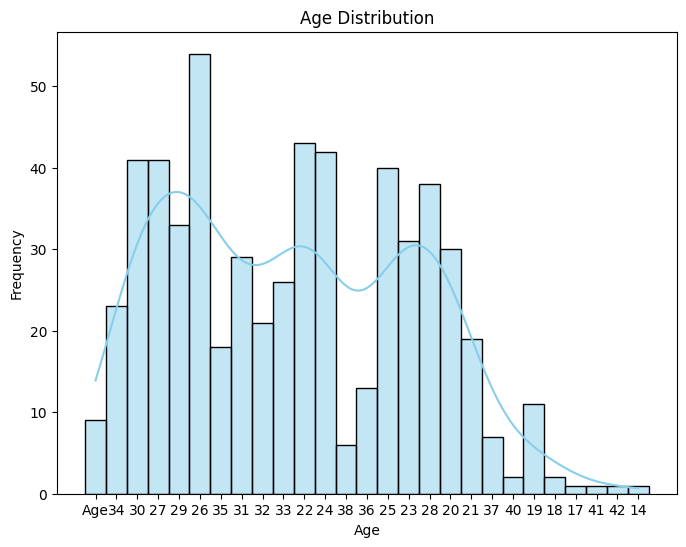

<ipython-input-29-2af6645cf40e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Specialism", data=data, palette="viridis")


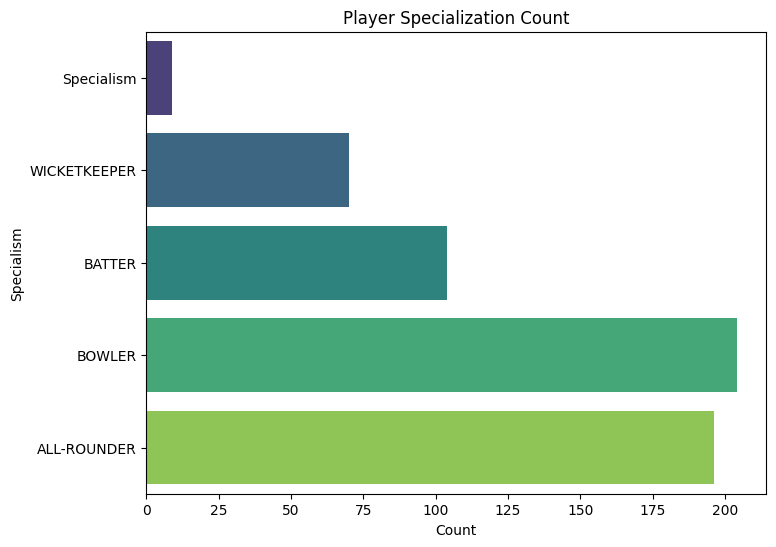

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(data.describe())

# Visualizations
plt.figure(figsize=(8, 6))
sns.histplot(data["Age"], bins=10, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Player specialization count
plt.figure(figsize=(8, 6))
sns.countplot(y="Specialism", data=data, palette="viridis")
plt.title("Player Specialization Count")
plt.xlabel("Count")
plt.ylabel("Specialism")
plt.show()


# **Player Age Analysis**

**Objectives**:To analyze age distributions and identify patterns.

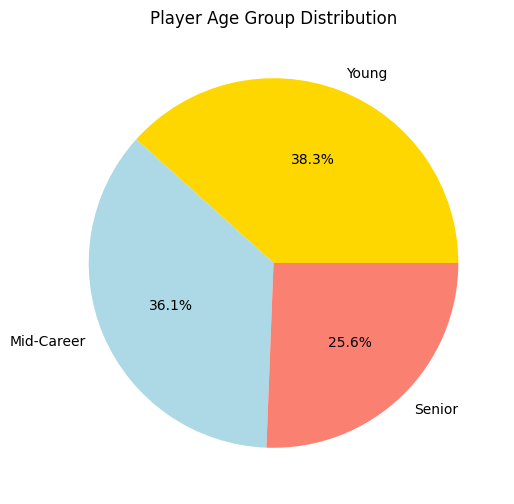

In [30]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

data.dropna(subset=['Age'], inplace=True)


data['Age Group'] = pd.cut(data['Age'], bins=[0, 25, 30, 100], labels=["Young", "Mid-Career", "Senior"])


age_group_counts = data["Age Group"].value_counts()
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind="pie", autopct="%1.1f%%", colors=["gold", "lightblue", "salmon"])
plt.title("Player Age Group Distribution")
plt.ylabel("")
plt.show()

# **Analyzing Price Differences Between Indian and Foreign Players**

**Objective**: To compare and analyze the base price differences between Indian and foreign players in IPL auctions using statistical measures and visualizations.

Indian Player Base Price Statistics:
count    140.000000
mean      68.464286
std       63.108609
min       30.000000
25%       30.000000
50%       30.000000
75%       75.000000
max      200.000000
Name: Base Price, dtype: float64

Foreign Player Base Price Statistics:
count    101.000000
mean     150.742574
std       54.135876
min       50.000000
25%       75.000000
50%      150.000000
75%      200.000000
max      200.000000
Name: Base Price, dtype: float64

Difference in Mean Base Price: 82.27828854314002


<ipython-input-36-384ff751cdf0>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(indian_prices, color="blue", label="Indian Players", shade=True)
<ipython-input-36-384ff751cdf0>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(foreign_prices, color="orange", label="Foreign Players", shade=True)


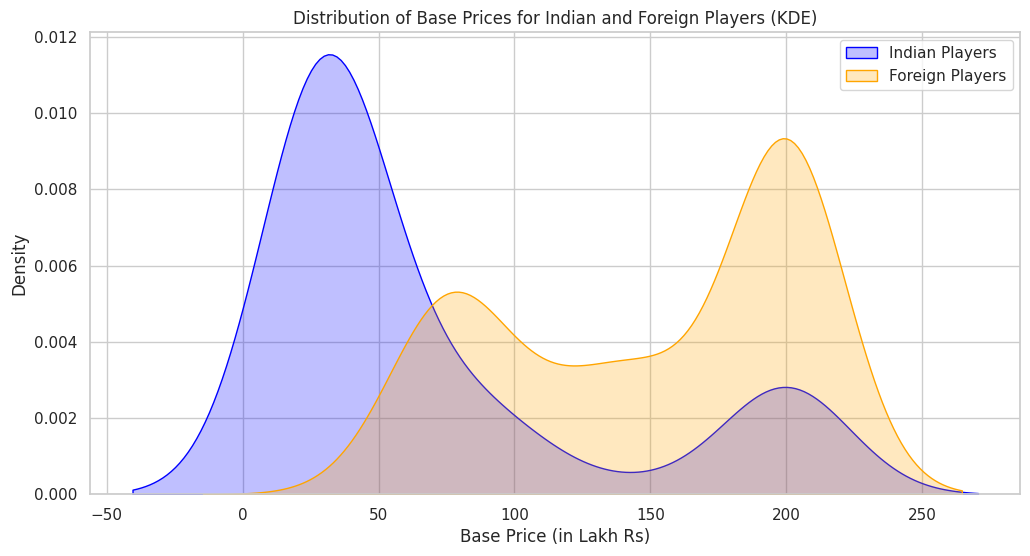

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

price_column = "Base Price"
indian_prices = indian_players[price_column].dropna()
foreign_prices = foreign_players[price_column].dropna()

indian_stats = indian_prices.describe()
foreign_stats = foreign_prices.describe()
mean_diff = foreign_stats['mean'] - indian_stats['mean']


print("Indian Player Base Price Statistics:")
print(indian_stats)
print("\nForeign Player Base Price Statistics:")
print(foreign_stats)
print("\nDifference in Mean Base Price:", mean_diff)

plt.figure(figsize=(12, 6))
sns.kdeplot(indian_prices, color="blue", label="Indian Players", shade=True)
sns.kdeplot(foreign_prices, color="orange", label="Foreign Players", shade=True)
plt.xlabel("Base Price (in Lakh Rs)")
plt.ylabel("Density")
plt.title("Distribution of Base Prices for Indian and Foreign Players (KDE)")
plt.legend()
plt.show()

**Correlation Analysis**

**Objective**: To find the correlation between Test, ODI, T20, and IPL caps.

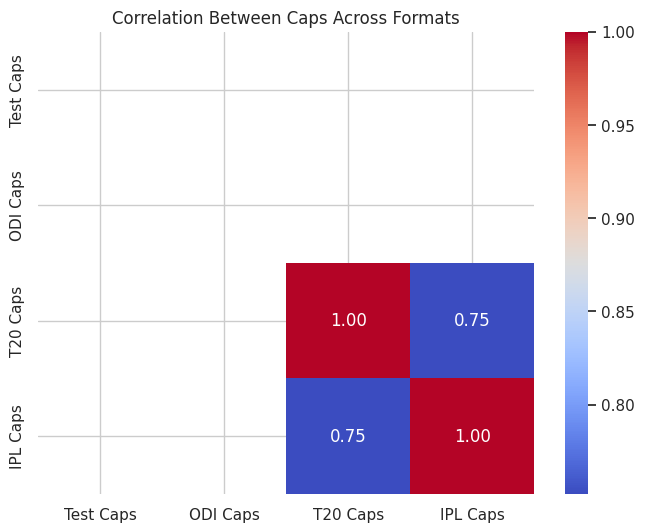

In [37]:
# Correlation matrix
caps_data = data[["Test Caps", "ODI Caps", "T20 Caps", "IPL Caps"]]
caps_data = caps_data.apply(pd.to_numeric, errors="coerce").fillna(0)
correlation_matrix = caps_data.corr()

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Caps Across Formats")
plt.show()


# **Auction Trends**

**Objectives**: To analyze auction trends

<ipython-input-38-8d5c922a67be>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette="magma")


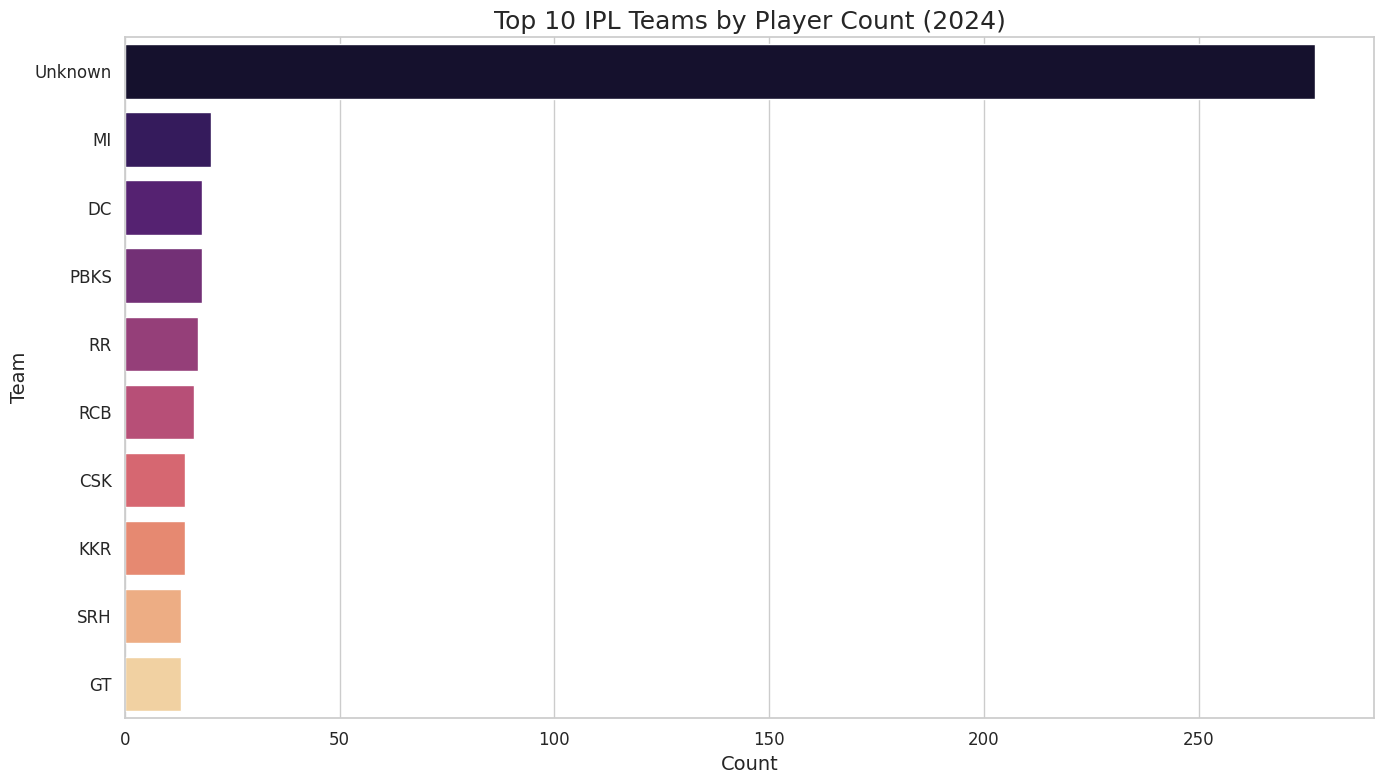

In [38]:

team_trends = data["2024 Team"].value_counts()

top_teams = team_trends.head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_teams.values, y=top_teams.index, palette="magma")
plt.title("Top 10 IPL Teams by Player Count (2024)", fontsize=18)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Team", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()




# **Predictive Modeling**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd


data["Selected"] = data["2024 Team"].apply(lambda x: 1 if x != "Unknown" else 0)


caps_data = data[["Test Caps", "ODI Caps", "T20 Caps", "IPL Caps"]].apply(pd.to_numeric, errors="coerce").fillna(0)
age_data = data[["Age"]].apply(pd.to_numeric, errors="coerce").fillna(0)
specialism_dummies = pd.get_dummies(data["Specialism"], prefix="Specialism", drop_first=True)

features = pd.concat([caps_data, age_data, specialism_dummies], axis=1)
target = data["Selected"]


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

           0       0.61      0.57      0.59        81
           1       0.65      0.68      0.66        94

    accuracy                           0.63       175
   macro avg       0.63      0.62      0.62       175
weighted avg       0.63      0.63      0.63       175



# **Data** **Extraction**

In [51]:
import pandas as pd

path = '/content/drive/MyDrive/Colab Notebooks/1731674068078_TATA IPL 2025- Auction List -15.11.24.csv'
data = pd.read_csv(path)
data.columns = [
    "List No", "Set No", "Set Name", "First Name", "Surname", "Country",
    "State", "DOB", "Age", "Specialism", "Test Caps", "ODI Caps", "T20 Caps",
    "IPL Caps", "Previous IPL Teams", "C/U/A", "2024 Team", "2024 IPL",
    "Reserve Price", "Reserve Price Unit", "Base Price"
]
data.dropna(subset=["First Name"], inplace=True)
data.fillna("Unknown", inplace=True)
print(data.head())
data.dropna(subset=["First Name"], inplace=True)
data.fillna("Unknown", inplace=True)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Base Price'] = pd.to_numeric(data['Base Price'], errors='coerce')
data.dropna(subset=['Age', 'Base Price'], inplace=True)
data.to_csv("Final_cleaned_ipl_data.csv", index=False)

       List No   Set No  Set Name  First Name  Surname       Country    State  \
2  List Sr.No.  Set No.  2025 Set  First Name  Surname       Country  Unknown   
5            1        1        M1         Jos  Buttler       England  Unknown   
6            2        1        M1     Shreyas     Iyer         India      MCA   
7            3        1        M1     Rishabh     Pant         India     DDCA   
8            4        1        M1      Kagiso   Rabada  South Africa  Unknown   

          DOB  Age    Specialism  ...            ODI Caps   T20 Caps  \
2         DOB  Age    Specialism  ...             Unknown  Test caps   
5  08/09/1990   34  WICKETKEEPER  ...  RIGHT ARM Off Spin         57   
6  06/12/1994   30        BATTER  ...  RIGHT ARM Off Spin         14   
7  04/10/1997   27        BATTER  ...  RIGHT ARM Off Spin         37   
8  25/05/1995   29        BOWLER  ...      RIGHT ARM Fast         66   

   IPL Caps Previous IPL Teams C/U/A            2024 Team 2024 IPL  \
2  ODI cap